## Programming Exercise 1: Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### 1. Plotting the Data
#### Use a scatter plot to visualize the data

In [3]:
df = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


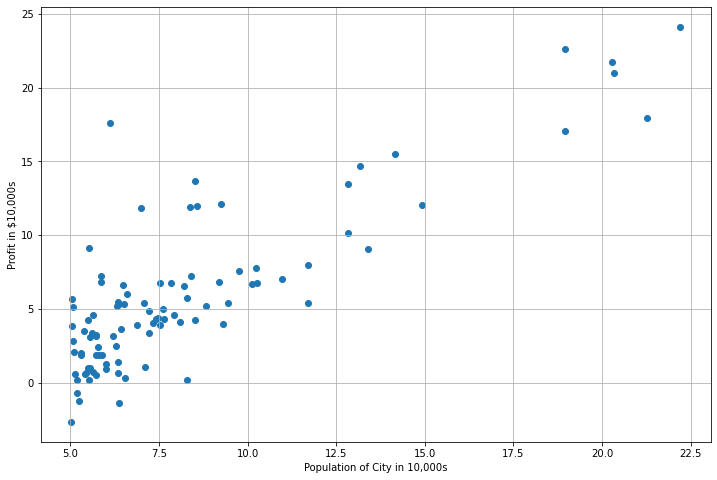

In [4]:
plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.scatter(df.population, df.profit)


##### 2. Compute Cost function cost J(θ)

$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [5]:
# insert a column
# in column one, named 'one', value '1'
df.insert(0, 'one', 1)

In [6]:
# different between array and matrix 
# vector and matrix and array?  
# inner product and cross product
X = np.array(df.iloc[:, 0:2])
y = np.array(df.iloc[:,-1])
theta = np.zeros(X.shape[1])

In [7]:
theta

array([0., 0.])

In [8]:
X.shape, theta.shape, y.shape

((97, 2), (2,), (97,))

In [9]:
# need to transpose as it's vector multipulation

def costFunc(X, y, theta):
    error = X @ theta.T - y
    cost = (error.T @ error)/(2*len(X))
    return cost

In [10]:
costFunc(X, y, theta)

32.072733877455676

In [11]:
# np.dot，dot and @ are the same thing that is inner product. 
# '*' 就是普通相乘

In [12]:
# b = np.array([2, 2, 2])
# c = np.array([2, 2, 2])
# b * c # array([4, 4, 4])
# b@c # 12
# np.dot(b, c) #12

##### 3. Batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [13]:
# 这是那个梯度的二阶导数
# 算点斜率
# calculating dot intercept
def gradientdect(X, y, theta):
    
    inner = X.T @ (X @ theta.T - y)/(len(X))
    
    return inner
    

In [100]:
# 
def bacthGradientDect(X, y, theta, epoch, alpha = 0.01):
    
    cost_data = [costFunc(X, y, theta)]
    _theta = theta.copy()
    
    for _ in range (epoch):
        
        # 这的theta替代与否都行，不替代，上面的theta数值都变了了，和比较模糊。
        # 但是说明用的是同一个theta
        # epoch有多少次就loop多少次
        # cost_data就会存起来多少次
        
        _theta = _theta - alpha * gradientdect(X, y, _theta)
        cost_data.append(costFunc(X, y, _theta))
    
    return _theta, cost_data

In [101]:
epoch = 500
final_theta, cost_data = bacthGradientDect(X, y, theta, epoch, alpha = 0.01)

In [102]:
final_theta

array([-2.28286727,  1.03099898])

In [18]:
costFunc(X, y, final_theta)

4.713809531116866

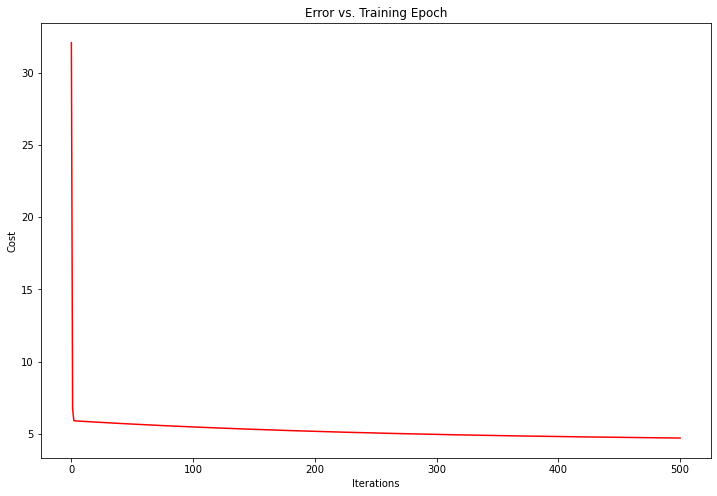

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch+1), cost_data, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

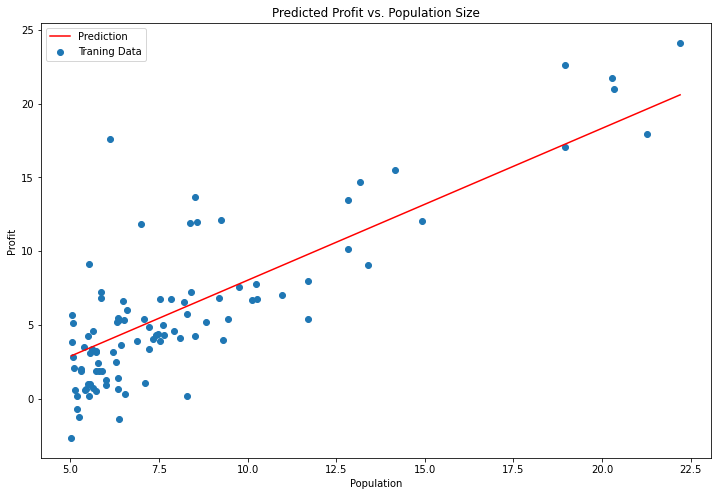

In [20]:
# f 是 直线方程
# f is linear function
x = np.linspace(df.population.min(), df.population.max(), 100)
f = final_theta[0] + (final_theta[1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

#### 4. Feature Scaling/Normalization 
##### - To enlarge some variables have small values, and scale some variables have large values, like lot size

In [22]:
df1 = pd.read_csv('ex1data2.txt', names = ['Size', 'Bedrooms', 'Price'])
df1.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
df1 = (df1 - df1.mean())/df1.std()
df1.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### 5. Linear regression with multiple variables 

In [25]:
df1.insert(0, 'one', 1)

In [43]:
X1 = np.array(df1.iloc[:,:-1])
y1 = np.array(df1.iloc[:, -1])
theta1 = np.array([0,0,0])

In [44]:
X1.shape, y1.shape, theta1.shape

((47, 3), (47,), (3,))

In [45]:
# cost function 是一样的，都是linear，所以不用改了，照用
# same as cost function as before, use it 
def costfuncM(X1, y1, theta1):
    
    error1 = X1 @ theta1.T - y1
    cost1 = (error1.T @ error1)/(2*(len(X1)))
    
    return cost1


In [46]:
costfuncM(X1, y1, theta1)

0.4893617021276598

In [47]:
epoch = 500
final_theta1, cost_data1 = bacthGradientDect(X1, y1, theta1, epoch, alpha = 0.01)

In [48]:
final_theta1

array([-5.53694206e-17,  8.30383883e-01,  8.23982853e-04])

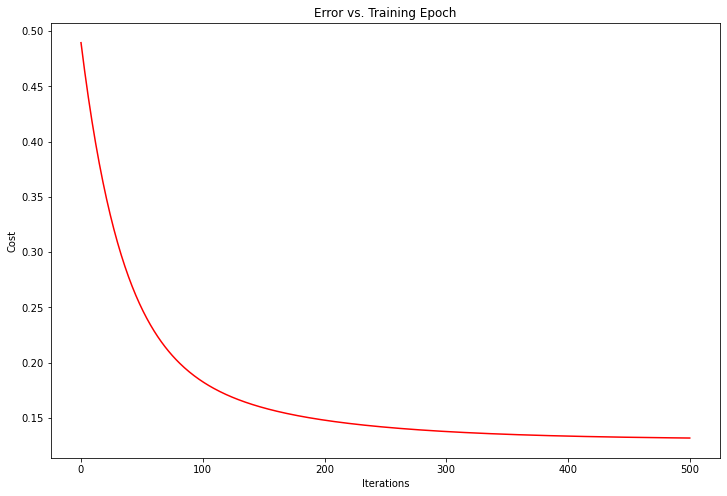

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch+1), cost_data1, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

#### 6. Normal Equations

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [118]:
# np.linalg.inv 这是 矩阵求逆的代码
def NormalEq(X, y):
    theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return theta


In [119]:
final_theta2 = NormalEq(X, y)
final_theta2

array([-3.89578088,  1.19303364])

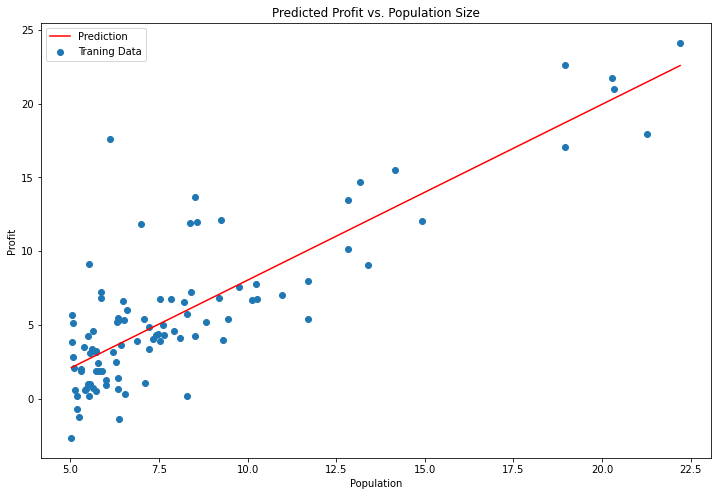

In [120]:
# f 是 直线方程
x = np.linspace(df.population.min(), df.population.max(), 2)
f = final_theta2[0] + (final_theta2[1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()